# Group Project:

## Public Media: Recommender Systems and User`s Interface

April/2021 

Hans Alberto Franke - 6987680

Gianis Fucker

Lena Walcher

In [4]:
import pandas as pd

In [5]:
names = ["News ID", "Category" , "SubCategory" , "Title", "Abstract", "URL", "Title Entities", "Abstract Entites"]
news_train = pd.read_csv(r'Small_data_set\train\news.tsv', sep='\t',header=None, names=names)
names = ["Impression ID", "User ID", "Time", "History", "Impressions"]
behaviors_train = pd.read_csv(r'Small_data_set\train\behaviors.tsv', sep='\t',header=None, names=names)
entity_embedding = pd.read_csv(r'Small_data_set\train\entity_embedding.vec', sep='\t',header=None)
relation_embedding = pd.read_csv(r'Small_data_set\train\relation_embedding.vec', sep='\t',header=None)


In [9]:
behaviors_train

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [8]:
news_train

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entites
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[]
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[]
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[]


In [6]:
relation_embedding

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,P31,-0.073467,-0.132227,0.034173,-0.032769,0.008289,-0.107088,-0.031712,-0.039581,0.101882,...,-0.050068,-0.053686,-0.045389,-0.037017,0.117190,-0.063597,-0.056910,0.058387,-0.114056,NaN
1,P21,-0.078436,0.108589,-0.049429,-0.131355,0.049300,-0.094605,-0.101469,0.127802,-0.081245,...,0.074341,-0.030571,-0.137183,0.045598,-0.151155,-0.066223,0.057489,0.130188,-0.054801,NaN
2,P106,-0.052137,0.052444,-0.019886,-0.152309,0.014144,-0.180491,-0.132198,0.063082,0.085229,...,-0.058958,-0.032021,-0.147213,0.082776,-0.169705,0.122445,-0.054737,0.055321,0.070961,NaN
3,P735,-0.051398,0.056219,0.068029,-0.137717,-0.030050,0.061566,-0.103184,-0.074124,-0.118975,...,-0.092234,0.056870,0.013640,0.042696,0.013683,-0.021127,-0.189257,0.055315,0.101863,NaN
4,P108,0.091231,0.022526,0.059349,-0.141853,0.035025,-0.111040,-0.127337,0.047645,-0.172328,...,-0.046994,-0.056248,-0.146538,0.121375,-0.211757,0.077591,-0.002200,-0.053880,0.140873,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,P1897,-0.019021,0.001183,-0.009602,-0.040833,-0.026919,-0.000777,-0.008379,0.002261,-0.010804,...,-0.032050,-0.002357,-0.049197,-0.023061,-0.027072,0.035122,-0.006339,-0.028845,-0.005709,NaN
1087,P3776,-0.018365,0.028526,-0.025934,0.032296,-0.015580,-0.012719,-0.009017,0.006737,-0.001155,...,-0.006468,-0.006864,0.004695,-0.015650,0.031345,-0.008722,0.024273,0.001479,0.032974,NaN
1088,P1194,-0.026819,0.003231,-0.011298,-0.015206,0.013172,-0.033084,0.026422,-0.005384,0.033045,...,-0.002927,-0.013136,0.018877,-0.015216,-0.006110,0.013847,-0.002365,0.034509,-0.003884,NaN
1089,P2502,0.003554,-0.041121,-0.010559,-0.037862,-0.003736,-0.002184,-0.015868,0.029463,0.023216,...,0.020671,-0.011002,0.041005,-0.022877,-0.055011,0.002874,-0.014109,-0.012319,-0.004955,NaN


In [7]:
entity_embedding

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,Q41,-0.063388,-0.181451,0.057501,-0.091254,-0.076217,-0.052525,0.050500,-0.224871,-0.018145,...,0.001861,0.124535,-0.151043,-0.263698,-0.103607,0.020007,-0.101157,-0.091567,0.035234,NaN
1,Q1860,0.060958,0.069934,0.015832,0.079471,-0.023362,-0.125007,-0.043618,0.134063,-0.121691,...,-0.014287,0.013578,0.099977,0.012199,-0.141138,0.056129,-0.133727,0.025795,0.051448,NaN
2,Q39631,-0.093106,-0.052002,0.020556,-0.020801,0.043180,-0.072321,0.000910,0.028156,0.176303,...,-0.086840,-0.078992,-0.062712,0.051117,-0.184307,0.127637,-0.144866,0.044690,0.013498,NaN
3,Q30,-0.115737,-0.179113,0.102739,-0.112469,-0.101853,-0.177516,0.015860,-0.092626,0.086708,...,0.080511,-0.000085,-0.089968,-0.083486,-0.149992,-0.053031,-0.136071,-0.029001,0.174155,NaN
4,Q60,-0.051036,-0.165637,0.132802,-0.089949,-0.146637,-0.142246,0.103853,-0.129651,0.096265,...,0.078628,0.003711,-0.058953,-0.154067,-0.117159,-0.031614,-0.140451,0.001288,0.140350,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,Q42225228,-0.051346,-0.028947,-0.075870,0.017512,-0.066910,-0.027968,0.020820,0.089614,-0.024825,...,-0.024313,0.034771,0.044909,0.043314,-0.020466,-0.009811,0.028233,-0.015396,0.063876,NaN
26900,Q54860678,-0.031620,-0.041283,-0.016871,0.044251,-0.022709,0.014341,0.034043,0.018170,0.002922,...,0.033638,0.070052,0.043695,-0.060374,0.036932,-0.014621,0.048494,-0.029104,0.057286,NaN
26901,Q54860790,0.034682,-0.009413,-0.024317,0.073895,0.028052,0.028039,0.039260,0.017398,0.017743,...,0.034473,0.035736,0.008329,-0.049981,-0.025212,-0.018404,0.004110,0.013771,-0.008027,NaN
26902,Q54862508,-0.052323,-0.078029,-0.060925,-0.052536,0.006802,-0.070488,-0.081736,0.026385,-0.037127,...,0.045298,0.009842,-0.019821,-0.033952,-0.047436,0.062752,0.043236,0.032251,-0.001261,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF4F6A9BB0>,
      dtype=object)

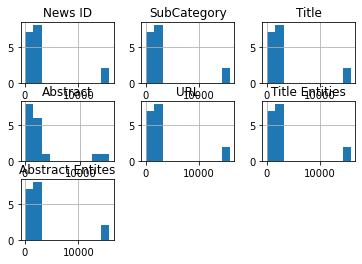

In [13]:
news_train.groupby("Category").count().hist()


## Global Settings

In [ ]:

import sys
sys.path.append("../../")
import os
import numpy as np
import zipfile
from tqdm import tqdm
#import scrapbook as sb
from tempfile import TemporaryDirectory
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from reco_utils.recommender.deeprec.deeprec_utils import download_deeprec_resources 
from reco_utils.recommender.newsrec.newsrec_utils import prepare_hparams
from reco_utils.recommender.newsrec.models.nrms import NRMSModel
from reco_utils.recommender.newsrec.io.mind_iterator import MINDIterator
from reco_utils.recommender.newsrec.newsrec_utils import get_mind_data_set

print("System version: {}".format(sys.version))
print("Tensorflow version: {}".format(tf.__version__))

Solving environment: ...working... done

# All requested packages already installed.



In [1]:

from reco_utils.recommender.deeprec.deeprec_utils import download_deeprec_resources 
from reco_utils.recommender.newsrec.newsrec_utils import prepare_hparams
from reco_utils.recommender.newsrec.models.nrms import NRMSModel
from reco_utils.recommender.newsrec.io.mind_iterator import MINDIterator
from reco_utils.recommender.newsrec.newsrec_utils import get_mind_data_set

ModuleNotFoundError: No module named 'reco_utils'

In [2]:
!conda install reco_utils

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - reco_utils

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


